In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
train=pd.read_csv('train.csv')

In [11]:
cor=train.corr()
    

In [7]:
train.shape

(1460, 43)

In [12]:
train11=train

In [14]:
train11=train11.drop(['Id', 'MSSubClass','LotArea','OverallCond','BsmtFinSF2','BsmtFinSF2','LowQualFinSF'
                     ,'BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr'
                     ,'EnclosedPorch','X3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
                     ,axis=1) # very low correlation

In [15]:
train11.shape

(1460, 63)

In [16]:
train11=train11.drop(['LandContour','LotShape','Utilities'],axis=1) # Utilities is categorical but second
  #.... category has 1 record

In [22]:
train11.shape


(1460, 60)

In [26]:
test=pd.read_csv('test (1).csv')

In [27]:
test11=test

In [28]:
test11=test11.drop(['Id', 'MSSubClass','LotArea','OverallCond','BsmtFinSF2','BsmtFinSF2','LowQualFinSF'
                     ,'BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr'
                     ,'EnclosedPorch','X3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
                     ,axis=1) # very low correlation

In [29]:
test11=test11.drop(['LandContour','LotShape','Utilities'],axis=1) 

In [39]:
test11.shape

(1459, 59)

In [32]:
x=train11.drop('SalePrice',axis=1)
y=train11[['SalePrice']]

In [33]:
train_dummy=pd.get_dummies(x)
test_dummy=pd.get_dummies(test11)

In [35]:
train_dummy.shape

(1460, 261)

In [36]:
test_dummy.shape

(1459, 244)

In [72]:
final_train,final_test= train_dummy.align(test_dummy,join='left',axis=1,fill_value=0)

In [73]:
final_train.shape

(1460, 261)

In [74]:
final_test.shape

(1459, 261)

In [75]:
from sklearn.preprocessing import StandardScaler
final_train1=final_train
final_test1=final_test
st= StandardScaler()
final_train=st.fit_transform(final_train)
final_test=st.fit_transform(final_test)

In [76]:
final_train=pd.DataFrame(final_train,columns=final_train1.columns)
final_test=pd.DataFrame(final_test,columns=final_test1.columns)

In [77]:
import warnings
warnings.filterwarnings("ignore")

In [78]:
cov_matrix=np.cov(final_train,rowvar=False)


In [79]:
eval1,evec=np.linalg.eig(cov_matrix)

In [80]:
eval1.shape

(261,)

In [81]:
evec.shape

(261, 261)

In [82]:
eig_pairs=[(eval1[index],evec[:,index]) for index in range(len(eval1))]

In [83]:
eig_pairs.sort()

In [84]:
eig_pairs.reverse()

In [85]:
tot=sum(eval1)
var_explained=[(i/tot) for i in sorted(eval1,reverse=True)]
cum_var=np.cumsum(var_explained)


Text(0, 0.5, 'Explained Variance')

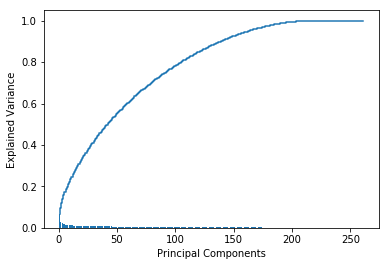

In [86]:
plt.bar(range(1,262),var_explained)
plt.step(range(1,262),cum_var)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

In [87]:
from sklearn.decomposition import PCA

In [88]:
pc=PCA(n_components=175)

In [89]:
pc_train=pc.fit_transform(final_train)

In [90]:
pc_test=pc.fit_transform(final_test)

In [91]:
pc_train=pd.DataFrame(pc_train)
pc_test=pd.DataFrame(pc_test)

In [94]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score,KFold
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import sklearn 
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [115]:
dt_model=DecisionTreeRegressor(random_state=2)
rf_model=RandomForestRegressor(n_estimators=100,max_depth=7,random_state=2)
base_knn=KNeighborsRegressor()
base_lin=LinearRegression()


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
params={'max_depth':np.arange(1,10)}
gt=GridSearchCV(dt_model,params)
gt.fit(pc_train,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
gt.best_params_


{'max_depth': 3}

In [107]:
params={'n_neighbors':np.arange(1,50)}
gt=GridSearchCV(base_knn,params)
gt.fit(pc_train,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
gt.best_params_

{'n_neighbors': 9}

In [112]:
from sklearn.ensemble import BaggingRegressor
Bagged_DT=BaggingRegressor(n_estimators=51
                            ,random_state=2)#default: base estimator is Dt
bagged_knn=BaggingRegressor(base_knn,n_estimators=17
                            ,random_state=2)
bagged_lin=BaggingRegressor(base_lin,n_estimators=17,random_state=2)


In [113]:
from sklearn.ensemble import AdaBoostRegressor
ada_dt= AdaBoostRegressor(n_estimators=51,random_state=2)
ada_lin=AdaBoostRegressor(base_estimator=base_lin,n_estimators=51,random_state=2)
ada_rf=AdaBoostRegressor(base_estimator=rf_model,n_estimators=51,random_state=2)

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
gra_model=GradientBoostingRegressor(n_estimators=100,random_state=2)

In [122]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
acc=[]
for name,model in zip(['Decision Tree','Random Forest','knn','base_lin','bagged_knn',
                      'bagged_lin','Bagged_DT','ada_dt','ada_lin','ada_rf'],
                     [dt_model,rf_model,base_knn,base_lin,bagged_knn,bagged_lin,Bagged_DT,ada_dt,
                     ada_lin,ada_rf]):
    
    for train,test in kf.split(pc_train,y):
        xtrain,xtest= pc_train.iloc[train,:],pc_train.iloc[test,:]
        ytrain,ytest=y.iloc[train,],y.iloc[test,]
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        acc.append(metrics.r2_score(ytest,ypred))
    print(1-np.mean(acc),round(np.var(acc,ddof=1),6),name)
        
        
   
   

0.62697974106833 0.01993 Decision Tree
0.7243746953592559 0.021564 Random Forest
0.721715084599209 0.015355 knn
0.39884537351268784 0.826201 base_lin
0.4631358831394079 0.671955 bagged_knn
0.06365771217294616 2.550027 bagged_lin
0.17219264255710132 2.248355 Bagged_DT
0.24524603808408654 1.998656 ada_dt
-0.23016244107604106 6.90331 ada_lin
-0.12409208648840873 6.302507 ada_rf


In [123]:
pred1=rf_model.predict(pc_test)

In [125]:
test_back=pd.read_csv('test (1).csv')

In [126]:
solution=pd.DataFrame({'Id':test_back.Id,'SalesPrice':pred1})

In [127]:
solution.to_csv('rf_m.csv')

In [129]:
from sklearn.ensemble import GradientBoostingRegressor
gra=GradientBoostingRegressor(n_estimators=100,random_state=2)

In [132]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
for train,test in kf.split(pc_train,y):
        xtrain,xtest= pc_train.iloc[train,:],pc_train.iloc[test,:]
        ytrain,ytest=y.iloc[train,],y.iloc[test,]
        gra.fit(xtrain,ytrain)
        ypred=gra.predict(xtest)
        acc.append(metrics.r2_score(ytest,ypred))
print(1-np.mean(acc),round(np.var(acc,ddof=1),6),name)

1.0370105070542235 5.796566 ada_rf
